In [1]:
data = """.#....#.###.........#..##.###.#.....##...
...........##.......#.#...#...#..#....#..
...#....##..##.......#..........###..#...
....#....####......#..#.#........#.......
...............##..#....#...##..#...#..#.
..#....#....#..#.....#.#......#..#...#...
.....#.#....#.#...##.........#...#.......
#...##.#.#...#.......#....#........#.....
....##........#....#..........#.......#..
..##..........##.....#....#.........#....
...#..##......#..#.#.#...#...............
..#.##.........#...#.#.....#........#....
#.#.#.#......#.#...##...#.........##....#
.#....#..#.....#.#......##.##...#.......#
..#..##.....#..#.........#...##.....#..#.
##.#...#.#.#.#.#.#.........#..#...#.##...
.#.....#......##..#.#..#....#....#####...
........#...##...#.....#.......#....#.#.#
#......#..#..#.#.#....##..#......###.....
............#..#.#.#....#.....##..#......
...#.#.....#..#.......#..#.#............#
.#.#.....#..##.....#..#..............#...
.#.#....##.....#......##..#...#......#...
.......#..........#.###....#.#...##.#....
.....##.#..#.....#.#.#......#...##..#.#..
.#....#...#.#.#.......##.#.........#.#...
##.........#............#.#......#....#..
.#......#.............#.#......#.........
.......#...##........#...##......#....#..
#..#.....#.#...##.#.#......##...#.#..#...
#....##...#.#........#..........##.......
..#.#.....#.....###.#..#.........#......#
......##.#...#.#..#..#.##..............#.
.......##.#..#.#.............#..#.#......
...#....##.##..#..#..#.....#...##.#......
#....#..#.#....#...###...#.#.......#.....
.#..#...#......##.#..#..#........#....#..
..#.##.#...#......###.....#.#........##..
#.##.###.........#...##.....#..#....#.#..
..........#...#..##..#..##....#.........#
..#..#....###..........##..#...#...#..#.."""

In [2]:
points = []
for y, line in enumerate(data.split()):
    points += [(x, y) for x, val in enumerate(line) if val == '#']

<IPython.core.display.Javascript object>


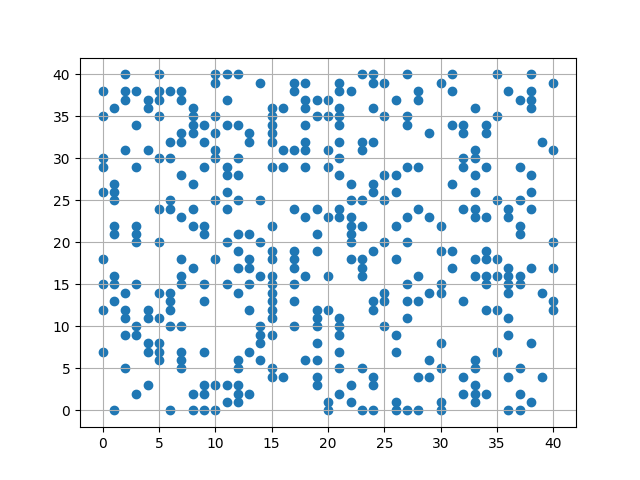

399

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.scatter([x for x, y in points], [y for x, y in points])
ax.autoscale()
plt.grid()
plt.show()

len(points)

In [4]:
from math import sqrt

def get_distance(p1, p2):
    (p1x, p1y), (p2x, p2y) = p1, p2
    return sqrt((p1x - p2x) ** 2 + (p1y - p2y) ** 2)

def is_between(a, b, c):
    return abs(get_distance(a, c) + get_distance(c, b) - get_distance(a, b)) < 10e-9
    
def count(p1):
    count = 0
    for p2 in points:
        if p1 == p2:
            continue
        for p3 in points:
            if p3 in (p1, p2):
                continue
            if is_between(p1, p2, p3):
                break
        else:
            count += 1
    return p1, count


from datetime import datetime
from multiprocessing import cpu_count
from multiprocessing.pool import Pool

start = datetime.now()
pool = Pool(cpu_count())
results = pool.map(count, points)
origin, result = next(iter(sorted(results, key=lambda e: -e[1])))
print("Elapsed time:", (datetime.now() - start).total_seconds())
origin, result

Elapsed time: 39.194451


((28, 29), 340)

In [5]:
from itertools import cycle
from math import atan2, degrees, tau

def get_angle(origin, point):
    (ox, oy), (px, py) = origin, point
    return (90 + degrees(atan2(py - oy, px - ox))) % 360

new_points = [
    (p, get_angle(origin, p), get_distance(origin, p)) 
    for p in points if p != origin]
new_points = sorted(new_points, key=lambda e: (e[1], e[2]))

angles = {}
for point, angle, distance in new_points:
    angles.setdefault(angle, [])
    angles[angle] += [point]

results = []
for angle in cycle(angles.keys()):
    if not angles[angle]:
        continue
    results.append(angles[angle].pop(0))
    if not any(angles.values()):
        break

a, b = results[199]
a * 100 + b

2628